In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [153]:
data=pd.read_csv("SMSSpamCollection.csv" , sep="\t" , header=None)

In [154]:
data.columns=["label" , "body_text"]
data.head(5)

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [155]:
data.shape

(5568, 2)

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5568 entries, 0 to 5567
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5568 non-null   object
 1   body_text  5568 non-null   object
dtypes: object(2)
memory usage: 87.1+ KB


In [157]:
data.describe()

,label,body_text
count,5568,5568
unique,2,5165
top,ham,"Sorry, I'll call later"
freq,4822,30


In [158]:
data.label.value_counts()

label
ham     4822
spam     746
Name: count, dtype: int64

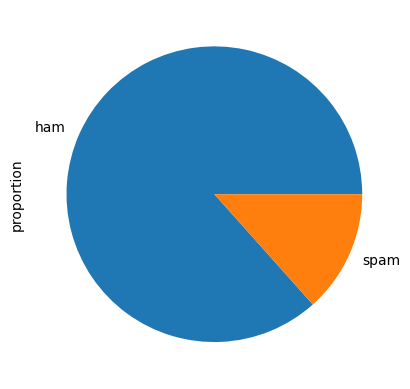

In [159]:
data.label.value_counts(normalize=True).plot.pie()
plt.show()

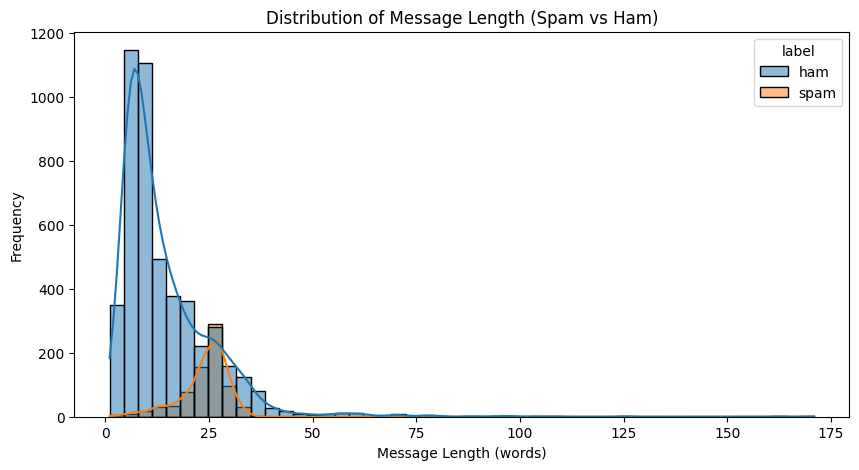

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt


data['msg_len'] = data['body_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,5))
sns.histplot(data=data, x='msg_len', hue='label', bins=50, kde=True)
plt.title("Distribution of Message Length (Spam vs Ham)")
plt.xlabel("Message Length (words)")
plt.ylabel("Frequency")
plt.show()


In [161]:
import re
import string
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# تحميل الموارد (تعملها مرة واحدة بس)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
ps = nltk.PorterStemmer()
stopwords_En = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
def preprocess_text(text, method="lemma"):
    text = "".join([char.lower() for char in text if char not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords_En]
    if method == "stem":
        tokens = [ps.stem(word) for word in tokens]
    else:
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)
data['cleaned_text'] = data['body_text'].apply(lambda x: preprocess_text(x))
data

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,label,body_text,msg_len,cleaned_text
0,ham,I've been searching for the right words to tha...,37,ive searching right word thank breather promis...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entry 2 wkly comp win fa cup final tkts 2...
2,ham,"Nah I don't think he goes to usf, he lives aro...",13,nah dont think go usf life around though
3,ham,Even my brother is not like to speak with me. ...,16,even brother like speak treat like aid patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,8,date sunday
...,...,...,...,...
5563,spam,This is the 2nd time we have tried 2 contact u...,30,2nd time tried 2 contact u u £750 pound prize ...
5564,ham,Will ü b going to esplanade fr home?,8,ü b going esplanade fr home
5565,ham,"Pity, * was in mood for that. So...any other s...",10,pity mood soany suggestion
5566,ham,The guy did some bitching but I acted like i'd...,26,guy bitching acted like id interested buying s...


🔑 الخلاصة:

لو مشروع بسيط (تصنيف Spam/Not Spam مثلاً) → استخدم TF-IDF.

لو مشروع عايز معنى أعمق (Sentiment Analysis, Chatbot, Translation) → استخدم Word Embeddings.

In [162]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
#tfidf = TfidfVectorizer(min_df=1)
tfidf = TfidfVectorizer( ngram_range=(2,2))
features_tfidf = tfidf.fit_transform(data['cleaned_text'])
print(features_tfidf.shape)
print('Sparse Matrix :\n', features_tfidf)
features_tfidf = tfidf.fit_transform(data['cleaned_text'])

features_tfidf.columns = tfidf.get_feature_names_out()
features_tfidf

(5568, 31659)
Sparse Matrix :
 <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 43768 stored elements and shape (5568, 31659)>
  Coords	Values
  (0, 14042)	0.2581988897471611
  (0, 23335)	0.2581988897471611
  (0, 22648)	0.2581988897471611
  (0, 30671)	0.2581988897471611
  (0, 26687)	0.2581988897471611
  (0, 3865)	0.2581988897471611
  (0, 21650)	0.2581988897471611
  (0, 30630)	0.2581988897471611
  (0, 26109)	0.2581988897471611
  (0, 12401)	0.2581988897471611
  (0, 11548)	0.2581988897471611
  (0, 10086)	0.2581988897471611
  (0, 21649)	0.2581988897471611
  (0, 30576)	0.2581988897471611
  (0, 3552)	0.2581988897471611
  (1, 9746)	0.1778771246640023
  (1, 8441)	0.22133093562975756
  (1, 30526)	0.2080707011088747
  (1, 5862)	0.22133093562975756
  (1, 30353)	0.22133093562975756
  (1, 8858)	0.22133093562975756
  (1, 6410)	0.2080707011088747
  (1, 9221)	0.22133093562975756
  (1, 27561)	0.22133093562975756
  (1, 569)	0.22133093562975756
  :	:
  (5563, 323)	0.24397838162236857
  (5563

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 43768 stored elements and shape (5568, 31659)>

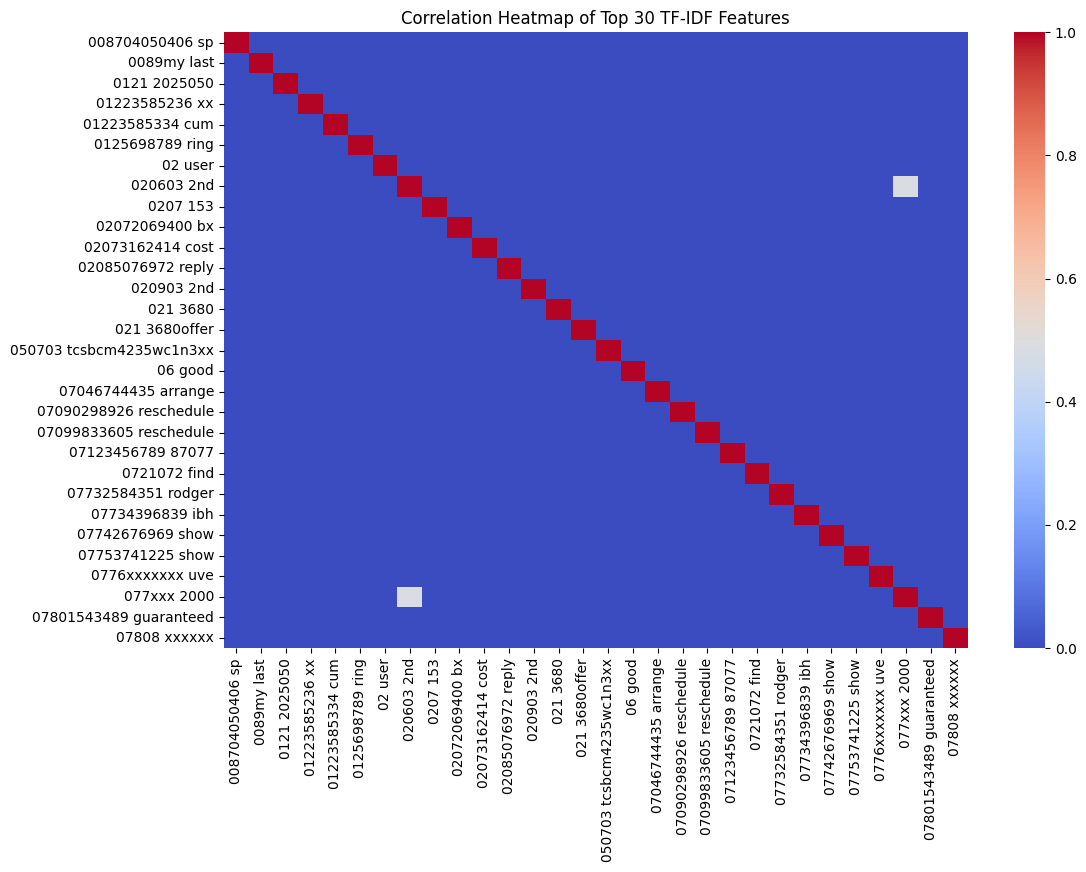

In [163]:
import numpy as np

import numpy as np
import pandas as pd

sample_features = features_tfidf[:, :30].toarray()

features_df = pd.DataFrame(sample_features, columns=tfidf.get_feature_names_out()[:30])


corr = np.corrcoef(features_df.T)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", 
            xticklabels=tfidf.get_feature_names_out()[:30], 
            yticklabels=tfidf.get_feature_names_out()[:30])
plt.title("Correlation Heatmap of Top 30 TF-IDF Features")
plt.show()


In [164]:
from sklearn.model_selection import train_test_split

tfidf = TfidfVectorizer(ngram_range=(1,3), max_features=5000)
X = tfidf.fit_transform(data['cleaned_text'])
y = data['label']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [165]:
from sklearn.naive_bayes import MultinomialNB

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "SVM": SVC(probability=True)


}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))



Naive Bayes Accuracy: 0.9686
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.77      0.87       149

    accuracy                           0.97      1114
   macro avg       0.98      0.88      0.92      1114
weighted avg       0.97      0.97      0.97      1114


Logistic Regression Accuracy: 0.9578
              precision    recall  f1-score   support

         ham       0.95      1.00      0.98       965
        spam       1.00      0.68      0.81       149

    accuracy                           0.96      1114
   macro avg       0.98      0.84      0.89      1114
weighted avg       0.96      0.96      0.95      1114


SVM Accuracy: 0.9731
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       1.00      0.80      0.89       149

    accuracy                           0.97      1114
   macro avg       0.98      0.90     

D:\Temp\ipykernel_18520\3509165093.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")


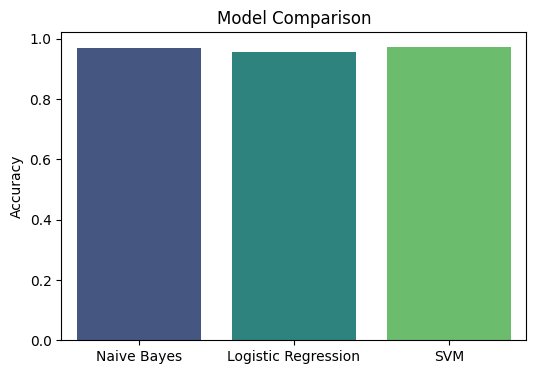

In [166]:
# Accuracy Comparison
plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()


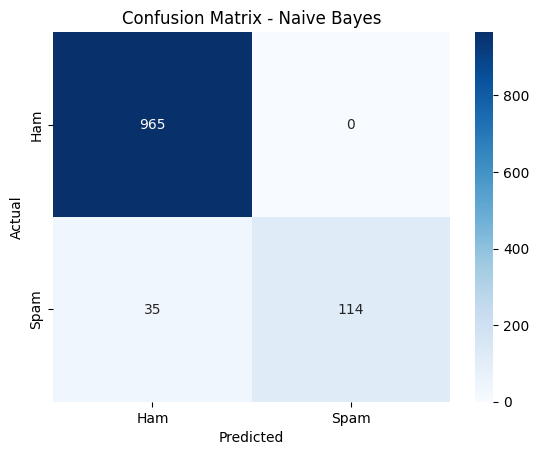

In [167]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

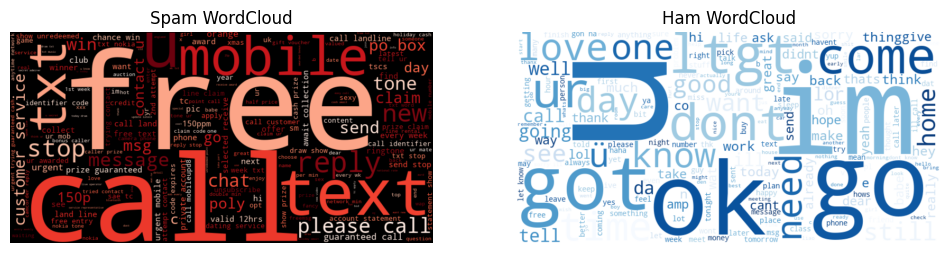

In [168]:
spam_words = " ".join(data[data['label']=='spam']['cleaned_text'])
ham_words = " ".join(data[data['label']=='ham']['cleaned_text'])

spam_wc = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(spam_words)
ham_wc = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(ham_words)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis("off")
plt.title("Spam WordCloud")

plt.subplot(1,2,2)
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis("off")
plt.title("Ham WordCloud")
plt.show()


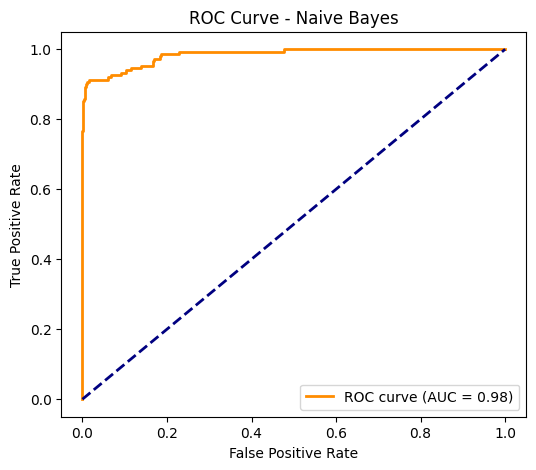

In [169]:
y_pred_prob = nb.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test.map({'ham':0,'spam':1}), y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naive Bayes")
plt.legend(loc="lower right")
plt.show()

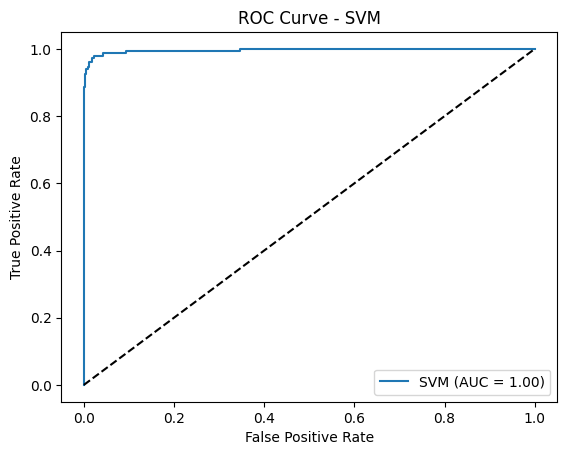

In [170]:
from sklearn.metrics import roc_curve, auc

sv = SVC(probability=True)
sv.fit(X_train, y_train)


y_scores = sv.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test.map({'ham':0,'spam':1}), y_scores)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label=f"SVM (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()


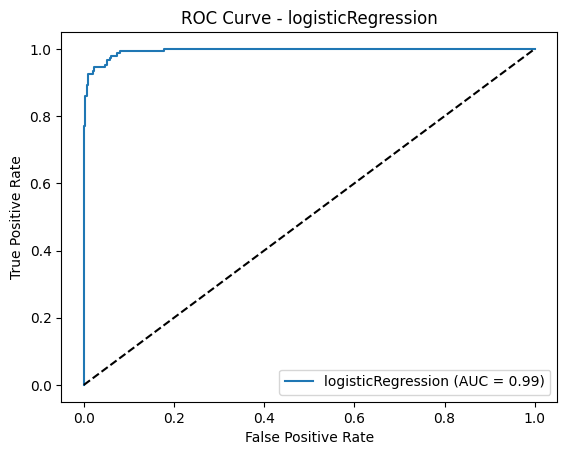

In [171]:
from sklearn.metrics import roc_curve, auc

sv1 = LogisticRegression(max_iter=200)
sv1.fit(X_train, y_train)


y_scores = sv1.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test.map({'ham':0,'spam':1}), y_scores)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label=f"logisticRegression (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - logisticRegression")
plt.legend()
plt.show()


In [172]:
import joblib
sv.fit(X_train, y_train)
joblib.dump(sv, "spam_model1.pkl")
joblib.dump(tfidf, "tfidf_vectorizer1.pkl")




['tfidf_vectorizer1.pkl']